<a href="https://colab.research.google.com/github/aimachaudhry/claims-analysis/blob/main/claims_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Upload CSV files
from google.colab import files
uploaded = files.upload()

Saving STONYBRK_20240531_CODE.csv to STONYBRK_20240531_CODE.csv
Saving STONYBRK_20240531_HEADER.csv to STONYBRK_20240531_HEADER.csv
Saving STONYBRK_20240531_LINE.csv to STONYBRK_20240531_LINE.csv


### PART 1 — Data Loading and Exploration

In [13]:
# Load data into dataframes
df_header = pd.read_csv("STONYBRK_20240531_HEADER.csv")
df_line = pd.read_csv("STONYBRK_20240531_LINE.csv")
df_code = pd.read_csv("STONYBRK_20240531_CODE.csv")

#### Exploration of each file

In [22]:
# Check the shape (rows x columns) for each file
print(df_header.shape)
print(df_line.shape)
print(df_code.shape)

(388, 43)
(520, 28)
(1536, 9)


In [10]:
# Display first 5 rows
df_header.head()
df_line.head()
df_code.head()

,ClientId,ProspectiveClaimId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
0,49,36752505,ABF,3,G93.6,NaN,NaN,NaN,NaN
1,49,36819490,ABF,4,N17.9,NaN,NaN,NaN,NaN
2,49,35352862,ABF,2,G06.1,NaN,NaN,NaN,NaN
3,49,35244774,ABF,10,G90.8,NaN,NaN,NaN,NaN
4,49,36745815,ABK,1,I77.819,NaN,NaN,NaN,NaN


In [11]:
# Show column names and data types
df_header.info()
df_line.info()
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClientId                 388 non-null    int64  
 1   ProspectiveClaimId       388 non-null    int64  
 2   ClaimType                388 non-null    object 
 3   BillingProviderNPI       388 non-null    int64  
 4   BillingProvFirstName     388 non-null    object 
 5   BillingProvLastName      0 non-null      float64
 6   AttendingProviderNPI     2 non-null      float64
 7   AttendingProvFirstName   2 non-null      object 
 8   AttendingProvLastName    2 non-null      object 
 9   RenderingProviderNPI     388 non-null    int64  
 10  RenderingProvFirstName   388 non-null    object 
 11  RenderingProvLastName    388 non-null    object 
 12  ReferringProviderNPI     87 non-null     float64
 13  ReferringProvFirstName   87 non-null     object 
 14  ReferringProvLastName    8

In [12]:
# Check for missing values
df_header.isna().sum()
df_line.isna().sum()
df_code.isna().sum()

,0
ClientId,0
ProspectiveClaimId,0
CodeQualifier,0
CodePos,0
CodeValue,0
CodeFromDate,1536
CodeToDate,1536
CodeAmnt,1536
POAInd,1536


In [14]:
# Descriptive statistics for numeric columns
df_line.describe()

,ClientId,ProspectiveClaimId,LinePos,RevCode,Modifier3,Modifier4,DxMap1,DxMap2,DxMap3,DxMap4,Units,Charges,PlaceOfService,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId
count,520.0,5.200000e+02,520.000000,0.0,0.0,0.0,520.000000,340.000000,232.000000,167.000000,520.0,520.000000,520.000000,0.0,0.0,0.0,0.0,0.0,520.0
mean,49.0,3.672637e+07,1.401923,NaN,NaN,NaN,1.150000,2.082353,3.064655,4.017964,1.0,455.521154,16.648077,NaN,NaN,NaN,NaN,NaN,4.0
std,0.0,3.278837e+05,0.861282,NaN,NaN,NaN,0.576181,0.433461,0.446391,0.445500,0.0,408.596021,5.041370,NaN,NaN,NaN,NaN,NaN,0.0
min,49.0,3.521699e+07,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,11.000000,NaN,NaN,NaN,NaN,NaN,4.0
25%,49.0,3.669946e+07,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,255.000000,11.000000,NaN,NaN,NaN,NaN,NaN,4.0
50%,49.0,3.683102e+07,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,330.000000,21.000000,NaN,NaN,NaN,NaN,NaN,4.0
75%,49.0,3.688171e+07,2.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,515.000000,21.000000,NaN,NaN,NaN,NaN,NaN,4.0
max,49.0,3.700149e+07,7.000000,NaN,NaN,NaN,6.000000,6.000000,7.000000,8.000000,1.0,2580.000000,23.000000,NaN,NaN,NaN,NaN,NaN,4.0


Observations

In [20]:
# Unique claims
unique_claims = df_header["ProspectiveClaimId"].nunique()
print("Unique claims:", unique_claims)

Unique claims: 388


In [17]:
# Convert service dates to datetime for analysis
df_header["ServiceFromDate"] = pd.to_datetime(df_header["ServiceFromDate"])
df_header["ServiceToDate"] = pd.to_datetime(df_header["ServiceToDate"])

In [18]:
# Date range of claims
print("Date range:", df_header["ServiceFromDate"].min(), "to", df_header["ServiceToDate"].max())

Date range: 2023-09-25 00:00:00 to 2024-05-29 00:00:00


In [19]:
# Average service lines per claim
avg_lines = df_line.groupby("ProspectiveClaimId").size().mean()
print("Average service lines per claim:", avg_lines)

Average service lines per claim: 1.3402061855670102


In [21]:
# Average diagnosis codes per claim
avg_dx = df_code.groupby("ProspectiveClaimId").size().mean()
print("Average diagnosis codes per claim:", avg_dx)

Average diagnosis codes per claim: 3.9587628865979383


### PART 2 — Relational Data Analysis

   BillingProviderNPI                 BillingProvFirstName  ClaimCount
5          1821035601                        SB INTERNISTS         152
0          1063468536               SB SURGICAL ASSOCIATES          81
2          1154376309     NEW YORK SPINE AND BRAIN SURGERY          69
4          1538114723  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY          40
3          1437105905            SB PSYCHIATRIC ASSOCIATES          36


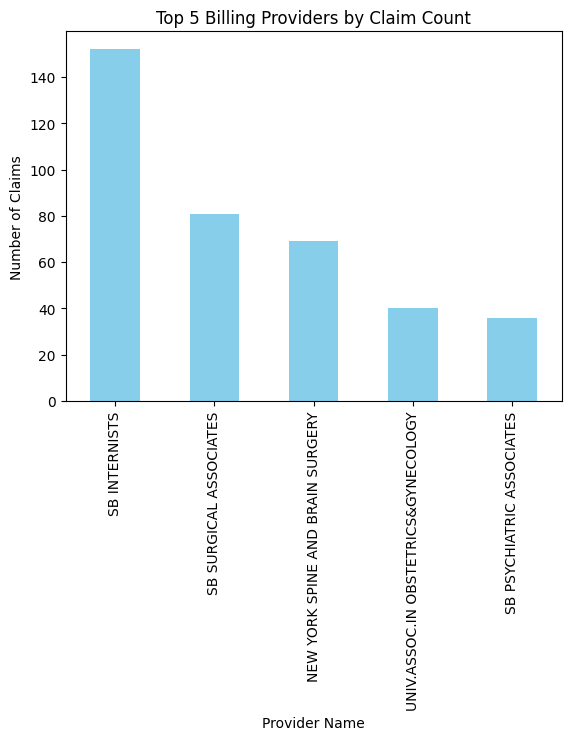

In [27]:
# Question 1: Provider Analysis
# Top 5 Billing Providers
top_providers = (
    df_header.groupby(["BillingProviderNPI", "BillingProvFirstName"])
    .size()  # count number of claims per provider
    .reset_index(name="ClaimCount")  # convert Series to DataFrame
    .sort_values("ClaimCount", ascending=False)
    .head(5)
)

# Display the top 5 providers
print(top_providers)

# Bar chart visualization
top_providers.plot(
    kind="bar",
    x="BillingProvFirstName", # Changed to BillingProvFirstName
    y="ClaimCount",
    legend=False,
    color="skyblue"
)
plt.title("Top 5 Billing Providers by Claim Count")
plt.xlabel("Provider Name")
plt.ylabel("Number of Claims")
plt.xticks
plt.show()

PrimaryPayerName
MEDICARE                      242
HEALTHFIRST FFS                46
FIDELIS/BETTER HEALTH PLAN     26
HIP MEDICAID                   17
HEALTHFIRST CAPITATED          10
Name: count, dtype: int64
PrimaryPayerName
MEDICARE                      62.371134
HEALTHFIRST FFS               11.855670
FIDELIS/BETTER HEALTH PLAN     6.701031
HIP MEDICAID                   4.381443
HEALTHFIRST CAPITATED          2.577320
Name: count, dtype: float64


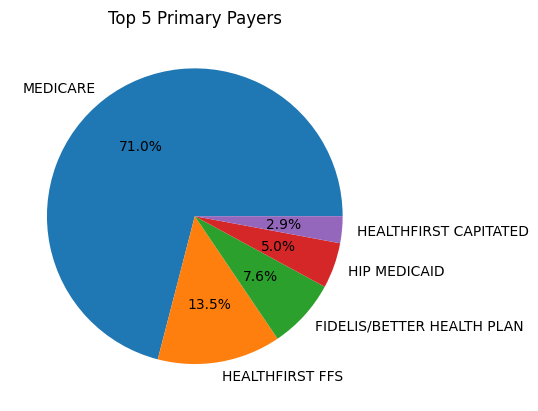

In [31]:
# Question 2: Payer Mix Analysis
# Top 5 primary payers by claim volume
top_payers = df_header["PrimaryPayerName"].value_counts().head(5)
print(top_payers)

# Percentage of total claims
top_payers_percent = top_payers / df_header.shape[0] * 100
print(top_payers_percent)

# Pie chart of payer distribution
top_payers_percent.plot(kind="pie", autopct="%1.1f%%")
plt.title("Top 5 Primary Payers")
plt.ylabel("")
plt.show()


CodeValue
J96.01    62
I10       49
E78.5     49
G93.5     34
D64.9     29
I25.10    27
I61.9     26
I48.91    24
I60.8     24
I50.9     22
Name: count, dtype: int64


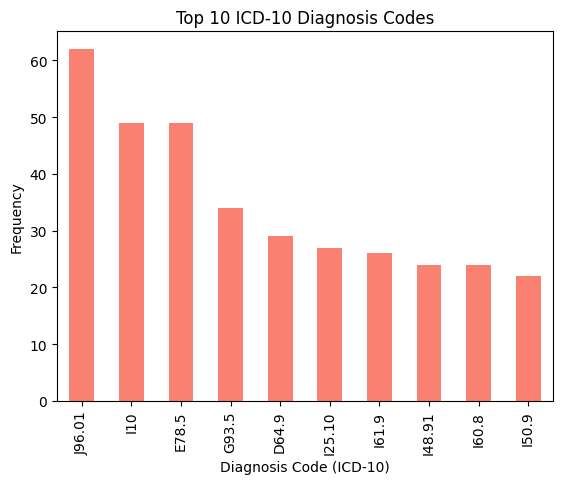

In [33]:
# Question 3: Common Diagnoses
# Count most frequent ICD-10 diagnosis codes
top_dx = df_code["CodeValue"].value_counts().head(10)
print(top_dx)

# Create a bar chart for the top 10 diagnosis codes
top_dx.plot(
    kind="bar",
    color="salmon"
)
plt.title("Top 10 ICD-10 Diagnosis Codes")
plt.xlabel("Diagnosis Code (ICD-10)")
plt.ylabel("Frequency")
plt.xticks()
plt.show()

   HCPCS  Frequency                                        Description
0  99291         68                  CRITICAL CARE, INITIAL FIRST HOUR
1  99233         48  SUBSEQUENT HOSP. CARE,PER DAY,FOR THE E&M OF A...
2  99213         39  OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,...
3  99223         33  INITIAL  HOSPITAL CARE PER DAY,FOR THE E&M OF ...
4  99222         32   INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF ...
5  99232         21  SUBS.HOSP.CARE EXPAND.PROBLEM FOCUSED HX.,EXAM...
6  90833         16  PSYCHOTHERAPY WITH AN E&M SERVICE,30 MINS,PATI...
7  92557         14  COMPREHENSIVE AUDIOMETRY THRESHOLD EVALUATION;...
8  99204         14  OFFICE/OUTPT VISIT FOR  THE E & M OF A NEW PAT...
9  99214         14  OFFICE/OUTPT VISIT,ESTAB. PATIENT,DETAILED HX,...


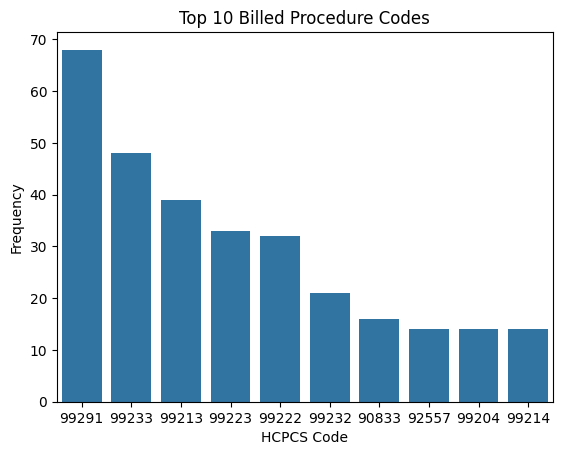

In [43]:
# Question 4: Common Procedures
# Count most frequent HCPCS/CPT procedure codes

# Group by HCPCS code and ClientProcedureName, count frequency
top_proc = (
    df_line.groupby("HCPCS")
    .agg(
        Frequency=("HCPCS", "size"),  # count occurrences
        Description=("ClientProcedureName", "first")  # first description for display
    )
    .sort_values("Frequency", ascending=False)
    .head(10)
    .reset_index()
)

# Display top 10 procedures with code, description, and frequency
print(top_proc)

# Plot bar chart
sns.barplot(
    data=top_proc,
    x="HCPCS",
    y="Frequency",
)
plt.title("Top 10 Billed Procedure Codes")
plt.xlabel("HCPCS Code")
plt.ylabel("Frequency")
plt.xticks()
plt.show()


Place of Service Claim Counts and Percentages:

                ClaimCount  Percentage
PlaceOfService                        
21                     231       59.54
11                     132       34.02
22                      24        6.19
23                       1        0.26


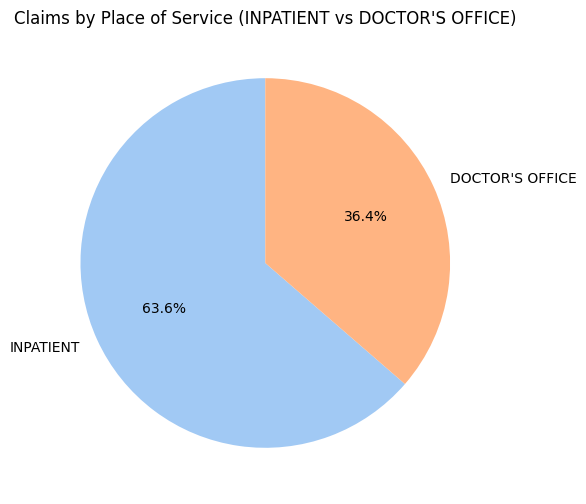

In [60]:
# Question 5: Service Location Analysis

# Count claims per PlaceOfService
pos_counts = df_header["PlaceOfService"].value_counts()
total_claims = pos_counts.sum()

# Create a DataFrame with claim counts and percentages
pos_summary = pd.DataFrame({
    "PlaceOfService": pos_counts.index,
    "ClaimCount": pos_counts.values,
    "Percentage": (pos_counts.values / total_claims * 100).round(2)
}).set_index("PlaceOfService")

# Display DataFrame
print("Place of Service Claim Counts and Percentages:\n")
print(pos_summary)

#Prepare data for pie chart (INPATIENT vs DOCTOR'S OFFICE)
pie_counts = pos_summary.loc[[21, 11], "ClaimCount"].copy()
pie_counts.index = ["INPATIENT", "DOCTOR'S OFFICE"]

# Step 4: Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    pie_counts,
    labels=pie_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Claims by Place of Service (INPATIENT vs DOCTOR'S OFFICE)")
plt.show()

### Part 3: Advanced Analysis with Joins

In [77]:
# Question 6: Claims with High Service Line Counts

# Merge HEADER and LINE files on ProspectiveClaimId
df_merged = df_header.merge(df_line, on="ProspectiveClaimId", how="inner")

# Calculate total number of service lines per claim
service_lines = df_merged.groupby(["ProspectiveClaimId", "BillingProviderNPI", "BillingProvFirstName"]).agg(
    NumberOfLines=("LinePos", "count"),        # count service lines
    TotalCharges=("Charges", "sum")            # sum of charges for all lines
).reset_index()

# Filter claims with 5 or more service lines
high_line_claims = service_lines[service_lines["NumberOfLines"] >= 5]

# Step 4: Display relevant information in a DataFrame format
print("Claims with 5 or more service lines:\n")
display(high_line_claims[["ProspectiveClaimId", "BillingProvFirstName", "NumberOfLines", "TotalCharges"]])

Claims with 5 or more service lines:



,ProspectiveClaimId,BillingProvFirstName,NumberOfLines,TotalCharges
79,36668119,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,6,1030
109,36710175,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,5,873
125,36740402,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,6,945
135,36757684,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,5,873
151,36794825,SB CHILDREN'S SERVICE,7,1163


Most common diagnosis codes associated with CPT 99291:



,DiagnosisCode,Frequency
0,J96.01,53
1,G93.5,34
2,E78.5,33
3,I61.9,26
4,D64.9,25
5,I10,24
6,I60.8,24
7,I95.9,20
8,D72.829,19
9,I67.848,17


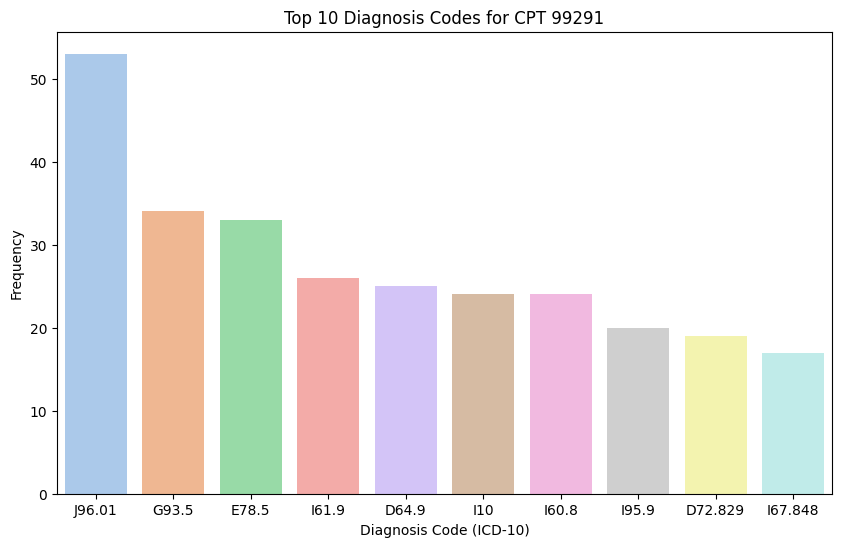

In [84]:
# Question 7: Diagnosis-Procedure Combinations

# Merge HEADER and LINE on ProspectiveClaimId
df_header_line = df_header.merge(df_line, on="ProspectiveClaimId", how="inner")

# Merge the result with CODE on ProspectiveClaimId
df_full = df_header_line.merge(df_code, on="ProspectiveClaimId", how="inner")

# Filter rows where HCPCS code is 99291
df_99291 = df_full[df_full["HCPCS"] == "99291"]

# Count the most frequent diagnosis codes associated with 99291
dx_counts = df_99291["CodeValue"].value_counts().reset_index()
dx_counts.columns = ["DiagnosisCode", "Frequency"]

# Display the most common diagnosis codes in DataFrame
print("Most common diagnosis codes associated with CPT 99291:\n")
display(dx_counts.head(10))

# Create bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=dx_counts.head(10),
    x="DiagnosisCode",
    y="Frequency",
    hue="DiagnosisCode",
    palette="pastel",
    legend=False
)
plt.title("Top 10 Diagnosis Codes for CPT 99291")
plt.xlabel("Diagnosis Code (ICD-10)")
plt.ylabel("Frequency")
plt.show()

Top 10 Payers by Total Charges:



,PrimaryPayerName,TotalCharges,AverageCharges,NumberOfClaims
17,MEDICARE,131008,541.355372,242
12,HEALTHFIRST FFS,29794,647.695652,46
9,FIDELIS/BETTER HEALTH PLAN,10810,415.769231,26
14,HIP MEDICAID,10014,589.058824,17
0,AETNA,6930,1155.000000,6
4,DIRECT SELF PAY,6575,1095.833333,6
21,UNITED COMMUNITY PLAN GOVT PROGRAM,5175,1035.000000,5
10,HEALTHFIRST CAPITATED,4905,490.500000,10
7,EMPIRE BLUE SR,4620,1155.000000,4
15,MAGNACARE,3465,1155.000000,3


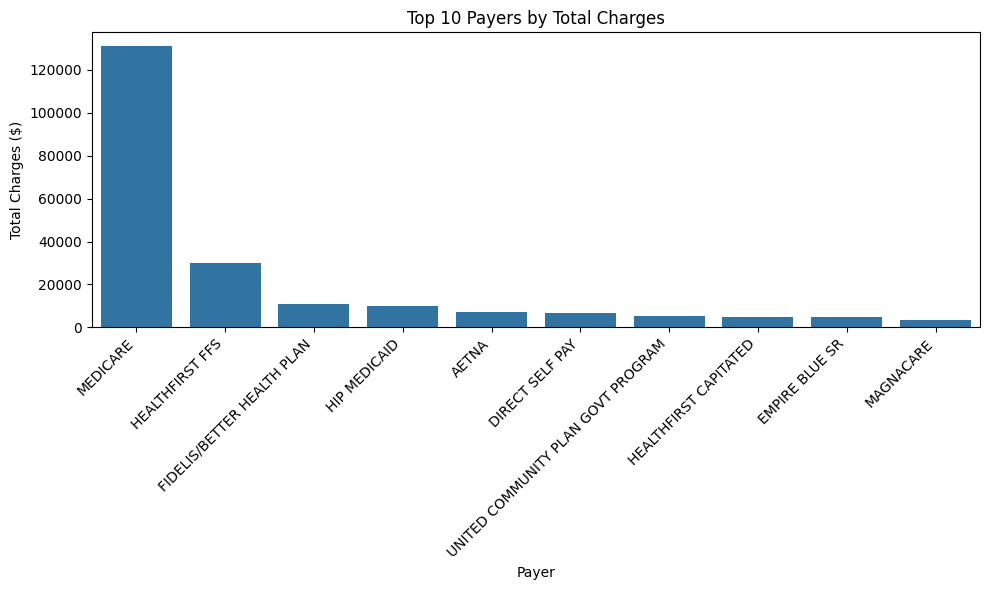

In [88]:
# Question 8: Charges by Payer

# Merge HEADER and LINE files on ProspectiveClaimId
df_merged = df_header.merge(df_line, on="ProspectiveClaimId", how="inner")

# Calculate total charges per claim
claim_charges = df_merged.groupby("ProspectiveClaimId").agg(
    TotalChargePerClaim=("Charges", "sum"),
    PrimaryPayerName=("PrimaryPayerName", "first")  # get payer per claim
).reset_index()

# Group by PrimaryPayerName to get totals, averages, and number of claims
payer_summary = claim_charges.groupby("PrimaryPayerName").agg(
    TotalCharges=("TotalChargePerClaim", "sum"),
    AverageCharges=("TotalChargePerClaim", "mean"),
    NumberOfClaims=("ProspectiveClaimId", "count")
).reset_index()

# Sort by total charges descending and display top 10 payers
top_payers = payer_summary.sort_values("TotalCharges", ascending=False).head(10)

print("Top 10 Payers by Total Charges:\n")
display(top_payers)

# Bar chart of total charges by payer
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_payers,
    x="PrimaryPayerName",
    y="TotalCharges",
)
plt.title("Top 10 Payers by Total Charges")
plt.xlabel("Payer")
plt.ylabel("Total Charges ($)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Part 4: Creative Analysis

Average Charges by Place of Service:

           PlaceOfServiceName  AverageCharges  NumberOfClaims
ON CAMPUS-OUTPATIENT HOSPITAL      989.625000              24
                    INPATIENT      678.593074             231
              DOCTOR'S OFFICE      423.901515             132
    EMERGENCY ROOM – HOSPITAL      410.000000               1


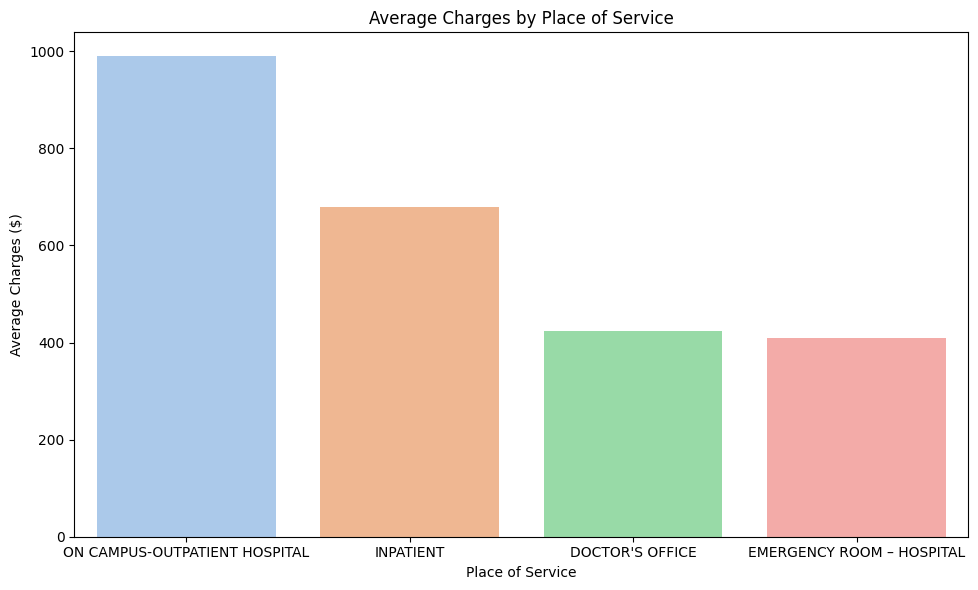

In [121]:
# What is the relationship between place of service and average charges?

# Merge df_header and df_line to link place of service with charges
df_pos_charges = df_header.merge(df_line, on="ProspectiveClaimId", how="inner")

# Calculate total charges per claim and include PlaceOfService
claim_pos_charges = df_pos_charges.groupby(["ProspectiveClaimId", "PlaceOfService_x"]).agg(
    TotalChargePerClaim=("Charges", "sum")
).reset_index()

# Create names for PlaceOfService codes
pos_map = {
    21: "INPATIENT",
    11: "DOCTOR'S OFFICE",
    22: "ON CAMPUS-OUTPATIENT HOSPITAL",
    23: "EMERGENCY ROOM – HOSPITAL"
}

# Map names
claim_pos_charges["PlaceOfServiceName"] = claim_pos_charges["PlaceOfService_x"].map(pos_map)

# Group by Place of Service to calculate average charges
avg_charges_by_pos = claim_pos_charges.groupby("PlaceOfServiceName").agg(
    AverageCharges=("TotalChargePerClaim", "mean"),
    NumberOfClaims=("ProspectiveClaimId", "count")
).reset_index()

# Sort by highest average charges
sorted_avg_charges = avg_charges_by_pos.sort_values("AverageCharges", ascending=False)

# Display results
print("Average Charges by Place of Service:\n")
print(sorted_avg_charges.to_string(index=False))

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=sorted_avg_charges,
    x="PlaceOfServiceName",
    y="AverageCharges",
    hue="PlaceOfServiceName",
    palette="pastel",
    legend=False
)
plt.title("Average Charges by Place of Service")
plt.xlabel("Place of Service")
plt.ylabel("Average Charges ($)")
plt.xticks()
plt.tight_layout()
plt.show()


### Interpretation:

- On Campus-Outpatient hospital has the highest average charges. This could mean that there could be complex outpatient procedures that were performed
- Inpatient services includes hospital stays, which are usually associated with higher charges than office visits
- Doctor's office charges are low, which can be expected for outpatient procedures
- Emergency room has the lowest charge, but this could be due to it only having one claim and the procedure could have been less extensive